#### * Helper function

In [204]:
# Plotting function

def pretty_print(var, text = ""):
    print("-------------------------------------------------------")
    print(text + ": \t" + str(var))
    print("-------------------------------------------------------")

## 1.2 ARMA vs. ARIMA Models for Financial Applications

The **ARMA ($p,q$) (Auto Regressive Moving Average) model** is a widely used time-series forecasting model. All ARMA model assume stationarity of data. When sources of non-stationarity are present (e.g. a trend), the ARMA model in its original form may not be suitable for analysis.

**ARIMA ($p,d,q$) (Auto Regressive Intergrated Moving Average) model** is essnetially similar to ARMA. The main difference between ARMA and ARIMA is that the latter applies an initial defferencing (I) on the time-series in hand to remove sources of non-stationarity, where "$d$" is the differencing order. 

Both models are summarized by two components:

 * Auto Regression ($p$) is the component aim to explain the momentum and predict future price based on past vaues in a stationary time-series.

 * Moving Average ($q$) is the component used to predict future error based on past forecasting error terms.

### 1.2.1: Advantages of ARMA and ARIMA Models in Financial Application

 


In [205]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.api as tsa
import copy

In [206]:
# Retrieve S&P500 data

snp = pd.read_csv(r"../Data/snp_500_2015_2019.csv")
snp.set_index(["Date"], inplace = True)
snp_close = snp["Close"].to_frame().apply(np.log)
snp

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2072.360107,2046.040039,2058.899902,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2017.339966,2054.439941,2020.579956,3799120000,2020.579956
2015-01-06,2030.250000,1992.439941,2022.150024,2002.609985,4460110000,2002.609985
2015-01-07,2029.609985,2005.550049,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2064.080078,2030.609985,2030.609985,2062.139893,3934010000,2062.139893
...,...,...,...,...,...,...
2018-12-24,2410.340088,2351.100098,2400.560059,2351.100098,2613930000,2351.100098
2018-12-26,2467.760010,2346.580078,2363.120117,2467.699951,4233990000,2467.699951
2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000,2488.830078


Text(0, 0.5, 'S&P 500')

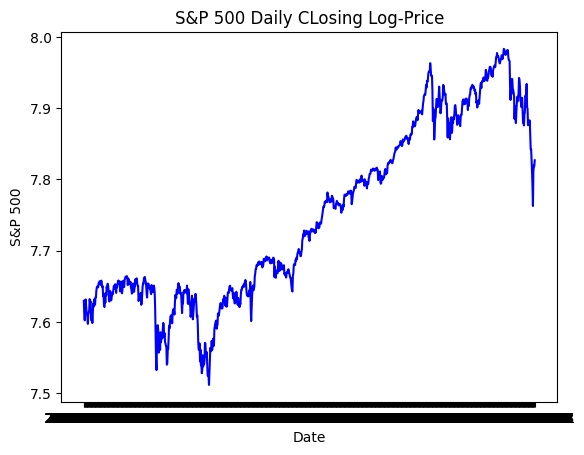

In [207]:
plt.gca().plot(snp_close, color = 'blue')
plt.title("S&P 500 Daily CLosing Log-Price")
plt.xlabel("Date")
plt.ylabel("S&P 500")

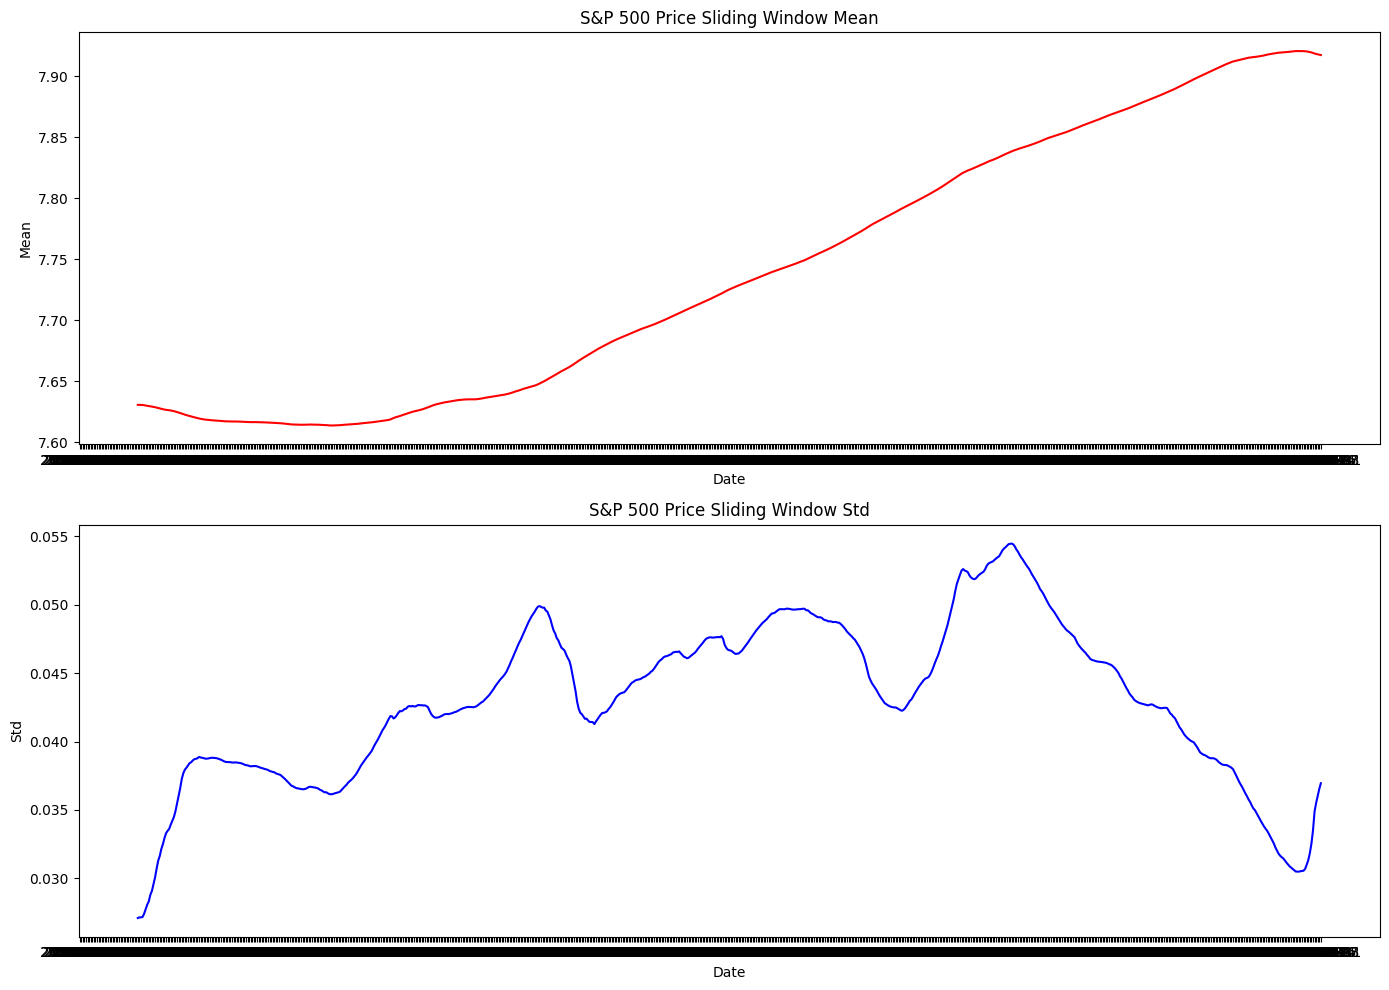

In [222]:
# Sliding window of 252 day using 1-day increment
window = 252
fig, axs = plt.subplots(2,1, figsize=(14,10))

# Sliding mean
axs[0].plot(snp_close.rolling(window).mean(), color = 'red')
axs[0].set_title("S&P 500 Price Sliding Window Mean")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Mean")

# Sliding standard deviation
axs[1].plot(snp_close.rolling(window).std(), color = 'blue')
axs[1].set_title("S&P 500 Price Sliding Window Std")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Std")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [209]:
# Define days to zoom in
days = range(150,250)
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ["True_ARMA"]

### 1.2.2 ARIMA(1,0) modelling

In [210]:
# -- ARMA Model --

# Find residual and calculate the prediction
snp_arma["Res_ARMA"] = tsa.ARIMA(snp_arma, order=(1,0,0)).fit().resid
# ARMA is deprecated in class statsmodels so we use ARIMA with order =(p,0,q) 
# --> ARMA(1,0,0) = ARMA(1,0)

snp_arma["Prediction_ARMA"] = snp_arma["True_ARMA"] - snp_arma["Res_ARMA"]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


-------------------------------------------------------
Mean Absolute Residual: 	0.005982005615699609
-------------------------------------------------------


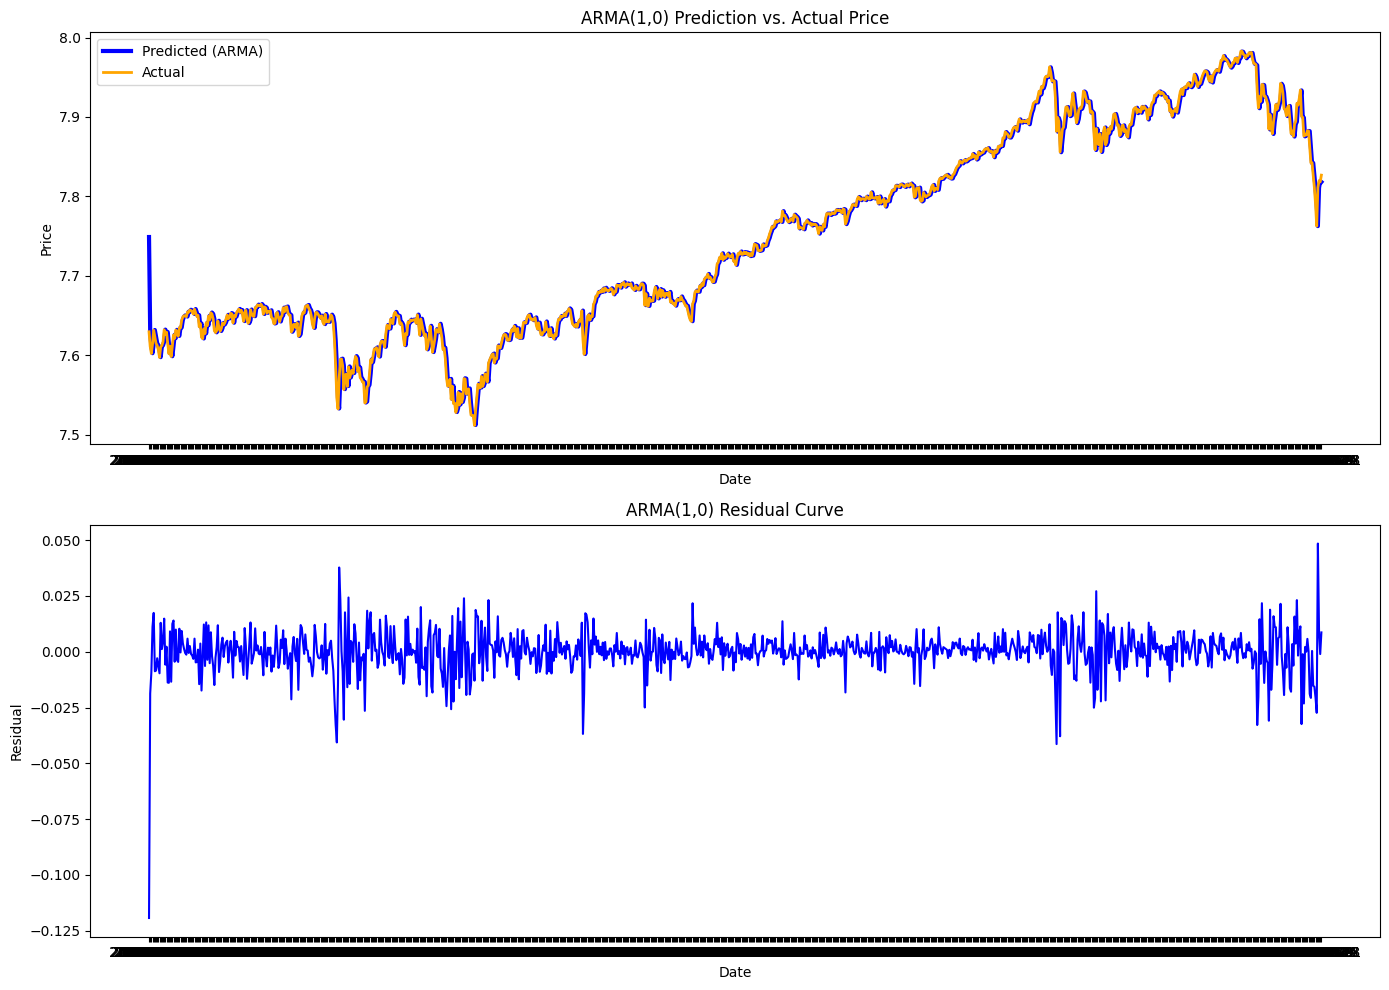

In [211]:
# Print Mean Absolute Residual
pretty_print(np.mean(abs(snp_arma["Res_ARMA"])),"Mean Absolute Residual")

# Plot actual vs predicted prices in zoomed window
fig, axs = plt.subplots(2,1, figsize=(14,10))

axs[0].plot(snp_arma["Prediction_ARMA"], color = 'blue', label = "Predicted (ARMA)", linewidth = 3)
axs[0].plot(snp_arma["True_ARMA"], color = 'orange', label = "Actual", linewidth = 2)
axs[0].legend(loc="upper left")
axs[0].set_title("ARMA(1,0) Prediction vs. Actual Price")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")

# Sliding standard deviation
axs[1].plot(snp_arma["Res_ARMA"], color = 'blue')
axs[1].set_title("ARMA(1,0) Residual Curve")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Residual")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [212]:
pretty_print(tsa.ARIMA(snp_arma['True_ARMA'].values, order=(1,0,0)).fit().arparams, 'Model Parameters')

-------------------------------------------------------
Model Parameters: 	[0.99735438]
-------------------------------------------------------


### 1.2.3 ARIMA(1,1,0) modelling

In [213]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ["True_ARIMA"]

In [214]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(snp_close['Close'])
pretty_print(result[0], "ADF Statistic")
pretty_print(result[1], "p-value")

-------------------------------------------------------
ADF Statistic: 	-1.2138759368829828
-------------------------------------------------------
-------------------------------------------------------
p-value: 	0.6675983326693917
-------------------------------------------------------


In [215]:
# -- ARIMA Model --

# Find residual and calculate the prediction
snp_arima["Res_ARIMA"] = tsa.ARIMA(snp_arima, order=(1,1,0)).fit().resid
snp_arima["Prediction_ARIMA"] = snp_arima["True_ARIMA"] - snp_arima["Res_ARIMA"]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


------------------------------------------------------------------------------------
Mean Absolute Residual:     0.013433086345304697
------------------------------------------------------------------------------------


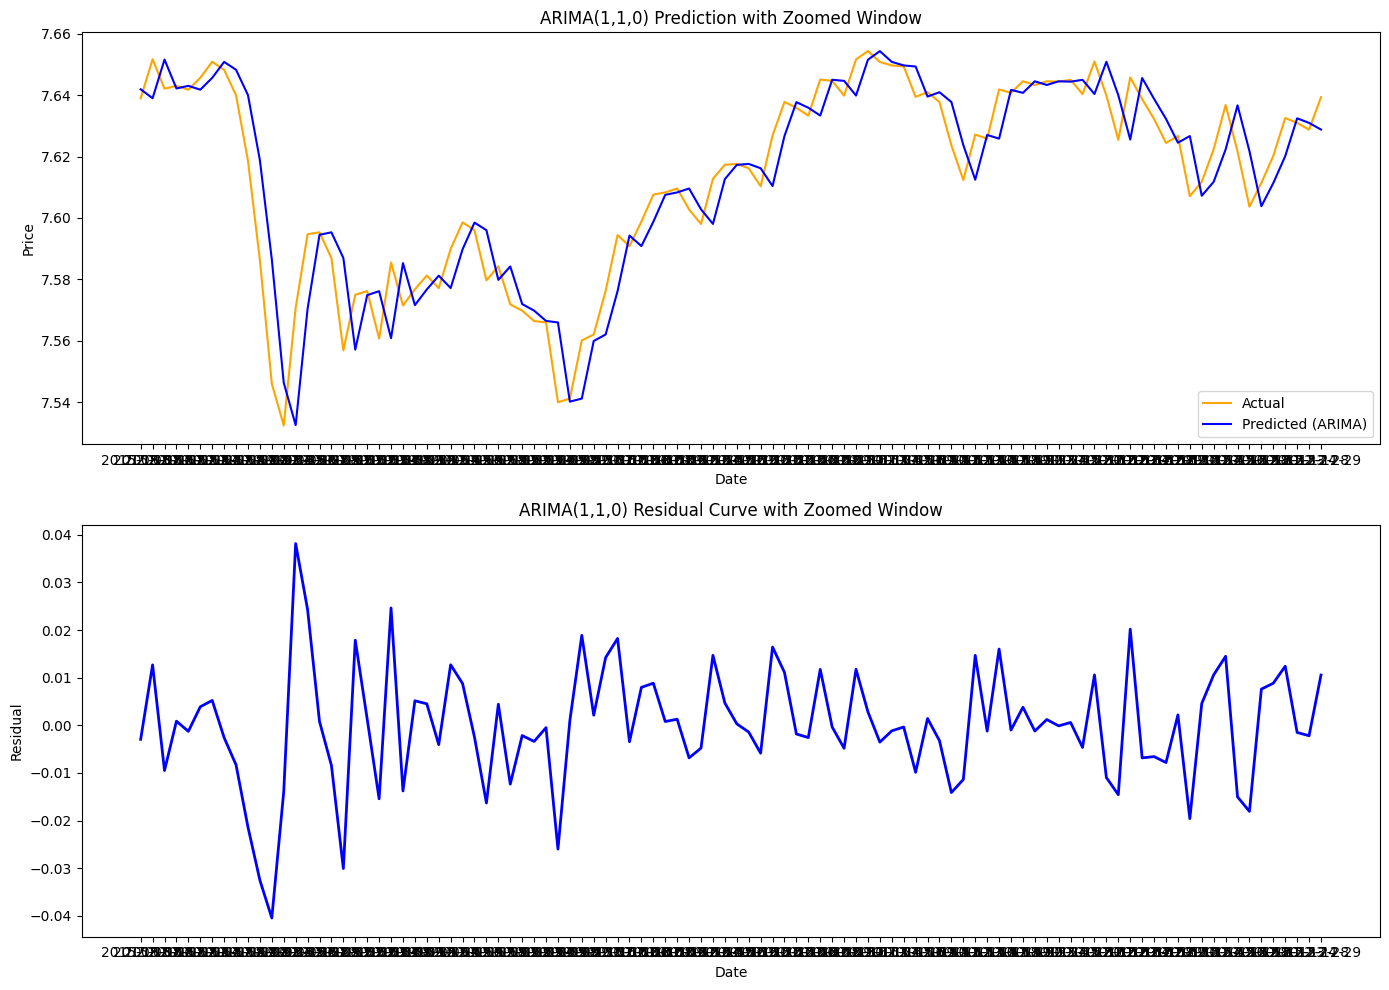

In [216]:
print("------------------------------------------------------------------------------------")
print("Mean Absolute Residual:    ", np.mean(abs(snp_arima["Res_ARIMA"])))
print("------------------------------------------------------------------------------------")

# Plot actual vs predicted prices for the ARIMA model
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

axs[0].plot(snp_arima["True_ARIMA"].iloc[days], color='orange', label="Actual")
axs[0].plot(snp_arima["Prediction_ARIMA"].iloc[days], color='blue', label="Predicted (ARIMA)")
axs[0].legend(loc="lower right")
axs[0].set_title("ARIMA(1,1,0) Prediction with Zoomed Window")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")

# Plot residuals for the ARIMA model
axs[1].plot(snp_arima["Res_ARIMA"].iloc[days], color='blue', linewidth = 2)
axs[1].set_title("ARIMA(1,1,0) Residual Curve with Zoomed Window")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Residual")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [217]:
pretty_print(tsa.ARIMA(snp_arima['True_ARIMA'].values, order=(1,1,0)).fit().arparams, "Model Parameters")

-------------------------------------------------------
Model Parameters: 	[-0.00816978]
-------------------------------------------------------


### 1.2.4 ARIMA analysis with log-prices

To be filled..

In [218]:
# Define input data
snp_arima = copy.deepcopy(snp["Close"].to_frame())
snp_arima.columns = ["True"]
print(snp_arima.shape)

(1006, 1)


In [219]:
# Define actual values starting from the second element to match residuals
actual = snp_arima["True"].iloc[1:]
# Fit ARIMA model and get residuals
arima_model = tsa.ARIMA(snp_arima["True"], order=(1,1,0)).fit()
res = arima_model.resid

# Calculate predicted values based on residuals
pred = actual - res

# Compute log-price for actual and predicted values
actual_log = np.log(actual)
pred_log = pd.Series(data=np.log(pred), index=actual.index)
res_log = pd.Series(data=actual_log - pred_log, index=actual.index)

# Now actual_log, pred_log, and res_log should have aligned lengths and no length mismatch.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


-------------------------------------------------------
Mean Absolute Residual:    : 	0.005855446192550567
-------------------------------------------------------


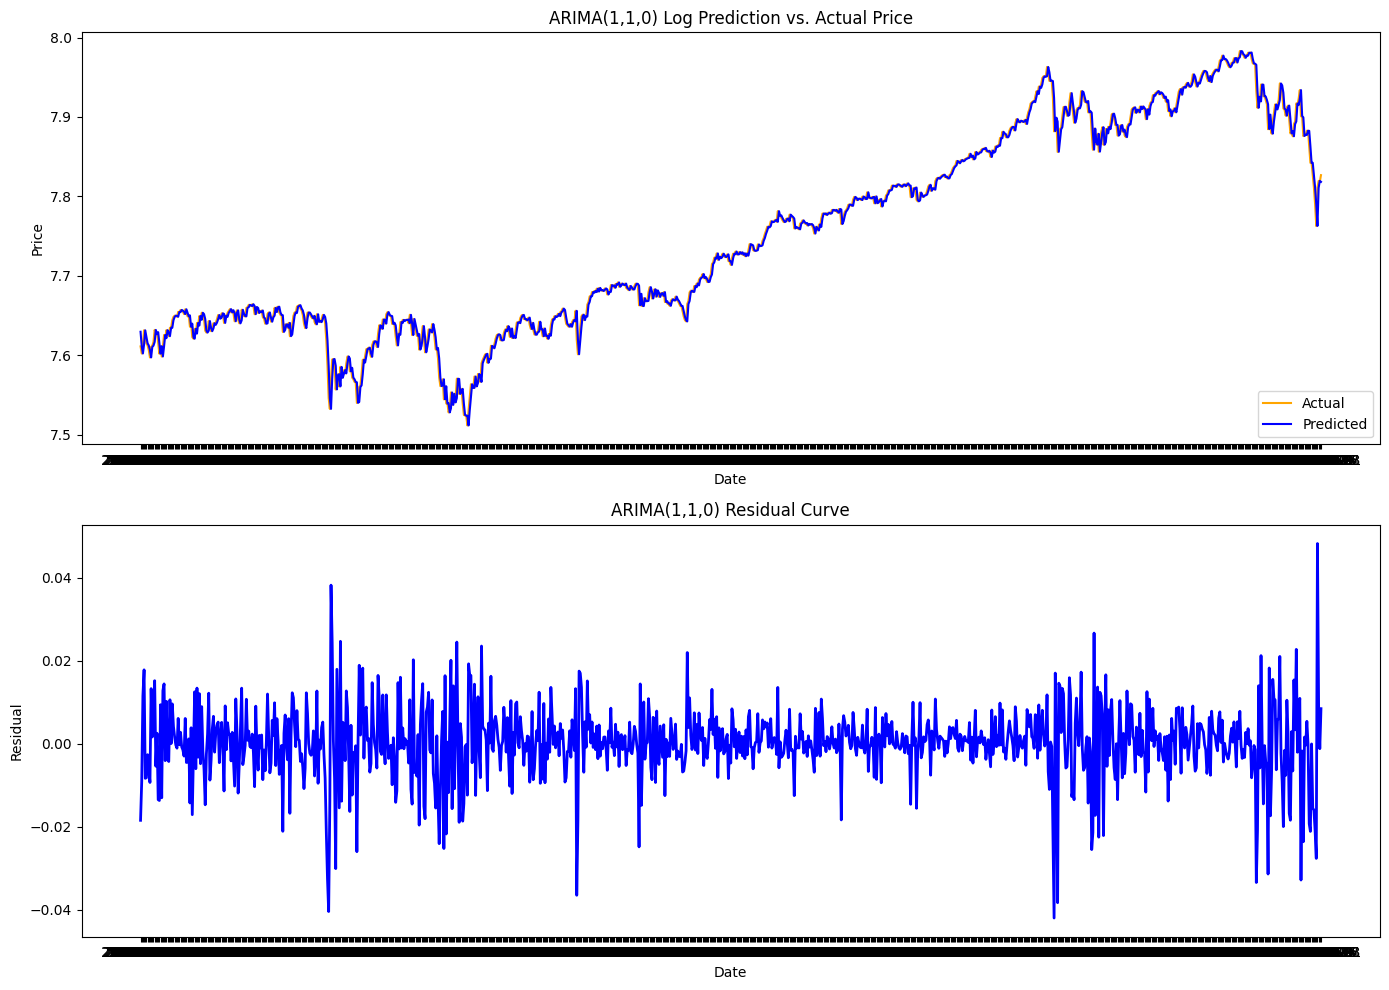

In [220]:
pretty_print(np.mean(abs(res_log)), "Mean Absolute Residual:    ")


# Plot actual vs predicted prices for the ARIMA model
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

axs[0].plot(actual_log, color='orange', label="Actual")
axs[0].plot(pred_log, color='blue', label="Predicted")
axs[0].legend(loc="lower right")
axs[0].set_title("ARIMA(1,1,0) Log Prediction vs. Actual Price")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")

# Plot residuals for the ARIMA model
axs[1].plot(res_log, color='blue', linewidth = 2)
axs[1].set_title("ARIMA(1,1,0) Residual Curve")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Residual")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [221]:
# Print model parameters.
pretty_print(tsa.ARIMA(snp_arima["True"].values, order=(1,1,0)).fit().arparams, 'Model Parameters')

-------------------------------------------------------
Model Parameters: 	[-0.00629791]
-------------------------------------------------------
